<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Basic_ops_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading and converting image to batch

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt


In [3]:
from skimage import io

In [5]:
img = io.imread('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-TensorFlow-2/master/Chapter03/res/bird_pic_by_benjamin_planche.png')

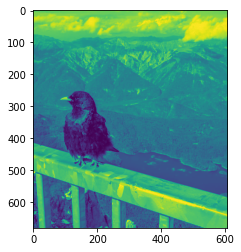

In [7]:
plt.imshow(img)

In [8]:
img1 = tf.convert_to_tensor(img,tf.float32,name='input_img')

In [9]:
img1 = tf.expand_dims(img1,axis=0)

In [10]:
img1 = tf.expand_dims(img1,axis=-1)

In [11]:
img1.shape

TensorShape([1, 680, 608, 1])

##Convolutions

###Filter for blurring images

In [12]:
kernel = tf.constant([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]],tf.float32,name='blur_filter')

In [13]:
kernel = tf.expand_dims(tf.expand_dims(kernel,axis=-1),axis=-1)

In [14]:
blur = tf.nn.conv2d(img1,kernel,strides=[1,1,1,1],padding='SAME')

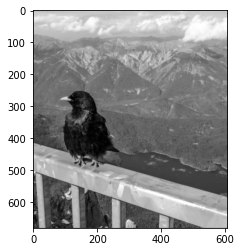

In [16]:
blurred_res = blur.numpy()
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
blurred_res = blurred_res[0, ..., 0]

plt.imshow(blurred_res, cmap=plt.cm.gray)